## Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12)

## Description

This notebook explores the effects of aridity on the distribution of streamflow.  

## Setup conditions

In [5]:
noise = 0.2
n = 1000
w = 2.6
pet_p_1 = 0.5 + noise * np.random.randn(n)
pet_p_1[pet_p_1 < 0] = 0
pet_p_2 = 2.0 + noise * np.random.randn(n)
pet_p_2[pet_p_2 < 0] = 0

aet_p_1 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w)**(1/w)))
q_p_1 = 1-aet_p_1
q_p_1[q_p_1 < 0] = 0 

aet_p_2 = (1 + (pet_p_2) - ((1 + (pet_p_2)**w)**(1/w)))
q_p_2 = 1-aet_p_2
q_p_2[q_p_2 < 0] = 0 

## Plot

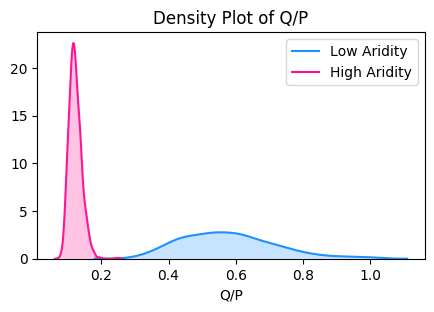

In [6]:
plt.figure(figsize=(5, 3), dpi=100)
sns.kdeplot(q_p_1, color="dodgerblue", label="Low Aridity", shade=True)
sns.kdeplot(q_p_2, color="deeppink", label="High Aridity", shade=True)
plt.title("Density Plot of Q/P")
plt.xlabel("Q/P")
plt.legend()